In [188]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git
import sys
#All these packages need to be installed from pip

#This will be doing most of the work
import networkx as nx

import sklearn #For generating some matrices
import pandas as pd #For DataFrames
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
import seaborn #Makes the plots look nice
import scipy #Some stats
import nltk #a little language code
from IPython.display import Image #for pics

import pickle #if you want to save layouts
import os

from os import listdir
from os.path import isfile, join

from stop_words import get_stop_words
stop_words = get_stop_words('es')

# comp-linguistics
import spacy
import nltk
from spacy import displacy
#Using NLP in spanish
nlp = spacy.load("es")
sys.path.insert(0, '../../scripts')
from data_cleaning import *
%matplotlib inline

The main purpose of this notebook is to extract the networks stablished between speeches, we will extract the count vector for it. This notebook's result is used as input for the final project of Content Analysis.

In [177]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [189]:
speech = pd.read_pickle("../../data/clean/speech.pkl")

In [190]:
g = wordCooccurrence(speech['normalized_words_in_sentences'].sum())

In [191]:
nx.to_numpy_matrix(g)[:10, :10]
mat = nx.to_numpy_matrix(g)
mat.shape

(15929, 15929)

In [192]:
def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    print(normalized)
    #normalized = remove_sw(normalized)
    return normalized
import sklearn.feature_extraction

In [193]:
senVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
senVects_incidence = senVectorizer.fit_transform(speech['cleaned text'])
#print(senVects_incidence.toarray())
#print(senVectorizer.get_feature_names()[:90])

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'doctor', 'manuel', 'prado', 'y', 'ugarteche', 'al', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'señores', 'representantes', 'excelentísimos', 'embajadores', 'hace', 'más', 'de', 'tres', 'lustros', 'que', 'en', 'este', 'mismo', 'recinto', 'de', 'las', 'leyes', 'presté', 'juramento', 'ante', 'la', 'constitución', 'y', 'los', 'santos', 'evangelios', 'para', 'ejercer', 'la', 'primera', 'magistratura', 'de', 'la', 'nación', 'al', 'entregar', 'la', 'banda', 'presidencial', 'el', 'de', 'julio', 'de', 'al', 'elegido', 'en', 'los', 'limpios', 'y', 'ejemplares', 'comicios', 'que', 'presidí', 'tuve', 'la', 'satisfacción', 'patriótica', 'de', 'dejar', 'la', 'casa', 'de', 'pizarro', 'entre', 'aclamaciones', 'y', 'aplausos', 'que', 'tenían', 'el', 'claro', 'sentido', 'de', 'aprobación', 'pública', 'los', 'actos', 'de', 'mi', 'gobierno', 'ejercido', 'bajo', 'el', 'ritmo', 'inalterable'

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'doctor', 'manuel', 'prado', 'y', 'ugarteche', 'al', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'señores', 'representantes', 'de', 'acuerdo', 'con', 'el', 'dispositivo', 'de', 'nuestra', 'carta', 'fundamental', 'presento', 'la', 'consideración', 'del', 'congreso', 'el', 'mensaje', 'que', 'contiene', 'la', 'obra', 'realizada', 'por', 'el', 'gobierno', 'durante', 'el', 'primer', 'año', 'del', 'segundo', 'periodo', 'constitucional', 'que', 'por', 'mandato', 'del', 'pueblo', 'ejerzo', 'desde', 'el', 'de', 'julio', 'de', 'mi', 'fervor', 'patriótico', 'se', 'acrecienta', 'en', 'estos', 'instantes', 'en', 'que', 'los', 'peruanos', 'evocamos', 'la', 'gesta', 'de', 'la', 'emancipación', 'y', 'el', 'heroico', 'esfuerzo', 'de', 'nuestros', 'libertadores', 'y', 'próceres', 'que', 'la', 'defendieron', 'y', 'consolidaron', 'rindo', 'ellos', 'mi', 'homenaje', 'haciendo', 'la', 'promesa'

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'doctor', 'manuel', 'prado', 'y', 'ugarteche', 'al', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señores', 'representantes', 'cumple', 'hoy', 'tres', 'años', 'el', 'régimen', 'que', 'honro', 'en', 'presidir', 'obstante', 'las', 'dificultades', 'propias', 'de', 'la', 'época', 'que', 'vivimos', 'como', 'consecuencia', 'de', 'las', 'convulsiones', 'sociales', 'y', 'económicas', 'que', 'agitan', 'al', 'mundo', 'la', 'obra', 'del', 'gobierno', 'del', 'de', 'julio', 'de', 'la', 'fecha', 'se', 'ha', 'desarrollado', 'en', 'forma', 'que', 'pone', 'de', 'manifiesto', 'mi', 'inquebrantable', 'empeño', 'al', 'servicio', 'de', 'la', 'nación', 'esta', 'labor', 'se', 'compendium', 'en', 'la', 'exposición', 'que', 'complazco', 'en', 'presentar', 'ante', 'vosotros', 'de', 'acuerdo', 'con', 'el', 'precepto', 'constitucional', 'relaciones', 'exteriores', 'el', 'perú', 'ha', 'seguido', 'con', 'firmeza', 'su', 'histórica', 'trayector

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'doctor', 'manuel', 'prado', 'y', 'ugarteche', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'sr', 'presidente', 'del', 'congreso', 'señores', 'representantes', 'complace', 'presentar', 'vuestra', 'consideración', 'el', 'recuento', 'de', 'la', 'labor', 'realizada', 'por', 'el', 'régimen', 'que', 'presido', 'durante', 'el', 'presente', 'año', 'de', 'mi', 'mandato', 'constitucional', 'relaciones', 'exteriores', 'consecuente', 'con', 'la', 'política', 'general', 'de', 'mi', 'gobierno', 'el', 'perú', 'en', 'sus', 'relaciones', 'exteriores', 'ha', 'mantenido', 'una', 'tónica', 'de', 'afirmación', 'nacionalista', 'y', 'la', 'vez', 'hemos', 'fomentado', 'una', 'atmósfera', 'de', 'cordialidad', 'con', 'todos', 'los', 'países', 'amigos', 'indispensable', 'en', 'estos', 'momento', 'cruciales', 'de', 'la', 'historia', 'con', 'firmeza', 'sostenido', 'la', 'necesidad', 'del', 'absoluto', 'respeto', 'los', 'precepto

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'arquitecto', 'fernando', 'belaúnde', 'terry', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señores', 'representantes', 'guardaré', 'y', 'haré', 'guardar', 'la', 'constitución', 'y', 'las', 'leyes', 'fueron', 'las', 'palabras', 'solemnes', 'que', 'sellaron', 'sintetizándolo', 'mi', 'juramento', 'al', 'asumir', 'el', 'mando', 'supremo', 'el', 'año', 'pasado', 'en', 'este', 'mismo', 'recinto', 'nunca', 'en', 'la', 'vida', 'de', 'la', 'república', 'la', 'frase', 'ritual', 'repetida', 'con', 'regularidad', 'de', 'plegaria', 'tuvo', 'mayor', 'contenido', 'de', 'fe', 'ni', 'más', 'profundo', 'sentido', 'de', 'realidad', 'porque', 'poniendo', 'mano', 'la', 'obra', 'sin', 'demora', 'el', 'poder', 'ejecutivo', 'convocó', 'ese', 'mismo', 'día', 'los', 'cabildos', 'abiertos', 'que', 'habrían', 'de', 'reunirse', 'una', 'semana', 'después', 'devolviendo', 'los', 'pueblo', 'su', 'derecho', 'tan', 'largamente', 'ar

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'arquitecto', 'fernando', 'belaúnde', 'terry', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señores', 'representantes', 'llegamos', 'mitad', 'de', 'camino', 'mitad', 'de', 'camino', 'entre', 'el', 'juramento', 'solemne', 'que', 'inició', 'este', 'régimen', 'y', 'el', 'término', 'improrrogable', 'que', 'la', 'constitución', 'le', 'fija', 'toca', 'cumplir', 'el', 'honroso', 'deber', 'de', 'dar', 'cuenta', 'al', 'congreso', 'de', 'la', 'labor', 'realizada', 'equidistante', 'en', 'el', 'tiempo', 'entre', 'punto', 'de', 'partida', 'y', 'la', 'meta', 'por', 'alcanzar', 'es', 'éste', 'el', 'momento', 'en', 'que', 'el', 'ayer', 'y', 'el', 'mañana', 'deben', 'ser', 'analizados', 'con', 'la', 'claridad', 'de', 'los', 'hechos', 'y', 'con', 'la', 'sinceridad', 'de', 'los', 'propósitos', 'mitad', 'de', 'camino', 'es', 'útil', 'comprobar', 'la', 'trayectoria', 'recorrida', 'señalar', 'los', 'hitos', 'de', 'progres

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'arquitecto', 'fernando', 'belaunde', 'terry', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señores', 'representantes', 'un', 'lustro', 'de', 'incansable', 'actividad', 'se', 'cumple', 'en', 'esta', 'fecha', 'habiéndonos', 'correspondido', 'sobrellevar', 'en', 'los', 'últimos', 'doce', 'meses', 'la', 'etapa', 'más', 'difícil', 'del', 'actual', 'periodo', 'más', 'por', 'fortuna', 'nos', 'toca', 'ahora', 'demostrar', 'que', 'la', 'estamos', 'superando', 'y', 'algo', 'más', 'señores', 'representantes', 'como', 'hemos', 'de', 'verlo', 'en', 'el', 'curso', 'de', 'este', 'mensaje', 'de', 'ser', 'en', 'esta', 'etapa', 'trascendente', 'portador', 'de', 'buenas', 'nuevas', 'para', 'la', 'república', 'en', 'los', 'momento', 'de', 'prueba', 'que', 'hemos', 'afrontado', 'ha', 'sido', 'factor', 'decisivo', 'para', 'vencerlos', 'la', 'actitud', 'de', 'profunda', 'madurez', 'de', 'nuestro', 'pueblo', 'que', 'tiene'

['mensaje', 'la', 'nación', 'del', 'presidente', 'del', 'perú', 'general', 'de', 'división', 'juan', 'velasco', 'alvarado', 'el', 'de', 'julio', 'de', 'nuestro', 'pueblo', 'empieza', 'ser', 'el', 'gran', 'protagonista', 'de', 'su', 'historia', 'compatriotas', 'en', 'este', 'nuevo', 'aniversario', 'de', 'nuestra', 'primera', 'independencia', 'el', 'gobierno', 'revolucionario', 'saluda', 'la', 'fuerza', 'armada', 'que', 'él', 'representa', 'y', 'al', 'pueblo', 'del', 'perú', 'que', 'ella', 'defiende', 'y', 'los', 'dos', 'fuente', 'de', 'su', 'inspiración', 'y', 'respaldo', 'incontrastable', 'de', 'su', 'poder', 'les', 'rinde', 'cuenta', 'de', 'la', 'labor', 'cumplida', 'en', 'el', 'curso', 'de', 'un', 'año', 'de', 'esforzado', 'trabajo', 'este', 'ha', 'sido', 'el', 'periodo', 'indispensable', 'de', 'afianzamiento', 'de', 'la', 'revolución', 'lo', 'largo', 'de', 'él', 'se', 'ha', 'profundizado', 'la', 'aplicación', 'de', 'reformas', 'sustanciales', 'iniciadas', 'anteriormente', 'por', 'el

['mensaje', 'la', 'nación', 'del', 'presidente', 'del', 'perú', 'general', 'de', 'división', 'juan', 'velasco', 'alvarado', 'el', 'de', 'julio', 'de', 'compatriotas', 'por', 'cuarta', 'vez', 'el', 'perú', 'conmemora', 'el', 'aniversario', 'de', 'su', 'primera', 'independencia', 'bajo', 'el', 'signo', 'de', 'esta', 'revolución', 'que', 'día', 'día', 'está', 'transformando', 'sus', 'basis', 'institucionales', 'para', 'alcanzar', 'el', 'objetivo', 'fundamental', 'de', 'crear', 'un', 'nuevo', 'ordenamiento', 'económico', 'político', 'y', 'social', 'debo', 'en', 'esta', 'ocasión', 'como', 'jefe', 'del', 'equipo', 'revolucionario', 'que', 'conduce', 'los', 'destinos', 'del', 'país', 'dirigirme', 'mis', 'conciudadanos', 'para', 'darles', 'cuenta', 'de', 'la', 'labor', 'cumplida', 'en', 'el', 'año', 'que', 'hoy', 'finaliza', 'y', 'para', 'formular', 'algunos', 'planteamientos', 'relacionados', 'con', 'aspectos', 'fundamentales', 'del', 'proceso', 'revolucionario', 'que', 'vive', 'nuestra', 'pa

['mensaje', 'la', 'nación', 'del', 'presidente', 'del', 'perú', 'general', 'de', 'división', 'ep', 'juan', 'velasco', 'alvarado', 'el', 'de', 'julio', 'de', 'compatriotas', 'al', 'conmemorarse', 'un', 'nuevo', 'aniversario', 'de', 'la', 'fundación', 'de', 'la', 'república', 'cumplo', 'con', 'el', 'deber', 'de', 'dirigirme', 'todos', 'los', 'peruanos', 'para', 'informarles', 'en', 'nombre', 'del', 'gobierno', 'revolucionario', 'sobre', 'los', 'aspectos', 'más', 'importantes', 'de', 'la', 'marcha', 'del', 'país', 'durante', 'al', 'año', 'que', 'hoy', 'finaliza', 'este', 'al', 'igual', 'que', 'los', 'otros', 'mensajes', 'de', 'la', 'revolución', 'será', 'un', 'informe', 'al', 'pueblo', 'del', 'perú', 'sobre', 'el', 'avance', 'del', 'proceso', 'y', 'sobre', 'los', 'problemas', 'que', 'plantea', 'la', 'construcción', 'revolucionaria', 'casi', 'al', 'terminar', 'su', 'sexto', 'año', 'de', 'fecunda', 'experiencia', 'un', 'hecho', 'sin', 'embargo', 'distingue', 'este', 'mensaje', 'de', 'los', 

['mensaje', 'la', 'nación', 'del', 'presidente', 'del', 'perú', 'general', 'de', 'división', 'ep', 'francisco', 'morales', 'bermudez', 'cerruti', 'el', 'de', 'julio', 'de', 'compatriotas', 'en', 'nuestro', 'día', 'nacional', 'todo', 'peruano', 'debe', 'rendir', 'homenaje', 'de', 'gratitud', 'y', 'admiración', 'los', 'heroicos', 'patriotas', 'que', 'con', 'su', 'sangre', 'y', 'su', 'espíritu', 'de', 'sacrificio', 'contribuyeron', 'forjar', 'las', 'bondades', 'del', 'espíritu', 'nacional', 'peruano', 'ellos', 'prestaron', 'un', 'noble', 'servicio', 'la', 'patria', 'y', 'su', 'ejemplo', 'ha', 'guiado', 'el', 'espíritu', 'de', 'nuestra', 'fuerza', 'armada', 'y', 'nuestras', 'fuerzas', 'policiales', 'por', 'eso', 'cuando', 'tenemos', 'que', 'enfrentarnos', 'grandes', 'y', 'difíciles', 'problemas', 'nacionales', 'es', 'conveniente', 'voltear', 'la', 'mirada', 'hacia', 'nuestros', 'próceres', 'hacia', 'aquellos', 'militares', 'y', 'civiles', 'que', 'constituyeron', 'la', 'alborada', 'y', 'la'

['mensaje', 'la', 'nación', 'del', 'presidente', 'del', 'perú', 'general', 'de', 'división', 'francisco', 'morales', 'bermúdez', 'cerrutti', 'el', 'de', 'julio', 'de', 'compatriotas', 'la', 'finalidad', 'de', 'un', 'mensaje', 'presidencial', 'debe', 'consistir', 'únicamente', 'en', 'informar', 'sino', 'sobre', 'todo', 'en', 'orientar', 'en', 'ofrecer', 'la', 'ciudadanía', 'la', 'posibilidad', 'de', 'interpretar', 'y', 'de', 'juzgar', 'debe', 'por', 'eso', 'reducirse', 'ser', 'un', 'recuento', 'de', 'datos', 'que', 'pueden', 'encontrarse', 'en', 'las', 'estadísticas', 'o', 'de', 'hechos', 'que', 'se', 'enumeran', 'en', 'los', 'anales', 'sino', 'que', 'tiene', 'que', 'destacar', 'lo', 'verdaderamente', 'significativo', 'aquello', 'que', 'incide', 'sobre', 'la', 'dinámica', 'de', 'la', 'vida', 'nacional', 'que', 'conforma', 'el', 'presente', 'y', 'que', 'habrá', 'de', 'influir', 'sobre', 'el', 'futuro', 'debe', 'por', 'eso', 'ser', 'un', 'alto', 'en', 'el', 'camino', 'que', 'permita', 'co

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'arquitecto', 'fernando', 'belaunde', 'terry', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'señores', 'representantes', 'la', 'constitución', 'impera', 'la', 'ley', 'rige', 'y', 'la', 'libertad', 'reina', 'en', 'la', 'república', 'tale', 'son', 'en', 'síntesis', 'los', 'mayores', 'logros', 'del', 'régimen', 'que', 'honro', 'en', 'presidir', 'más', 'es', 'justo', 'y', 'es', 'hidalgo', 'compartir', 'esas', 'conquistas', 'con', 'quienes', 'han', 'contribuido', 'decididamente', 'lograrlas', 'la', 'civilidad', 'tras', 'larga', 'espera', 'paciente', 'maduración', 'y', 'tenaz', 'perseverancia', 'logró', 'marcar', 'en', 'las', 'ánforas', 'el', 'rumbo', 'democrático', 'del', 'perú', 'en', 'ese', 'empeño', 'se', 'reencontró', 'con', 'sus', 'fuerzas', 'armada', 'que', 'en', 'rectum', 'decisión', 'institucional', 'acordaron', 'despejar', 'ese', 'camino', 'acatando', 'la'

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'arquitecto', 'fernando', 'belaunde', 'terry', 'ante', 'elcongreso', 'nacional', 'el', 'de', 'julio', 'de', 'señores', 'representantes', 'una', 'tonificante', 'brisa', 'continental', 'ha', 'bañado', 'mi', 'frente', 'al', 'concluir', 'este', 'mi', 'tercer', 'año', 'de', 'gobierno', 'y', 'en', 'la', 'patria', 'de', 'bolívar', 'donde', 'acudimos', 'conmemorar', 'fervientemente', 'el', 'bicentenario', 'de', 'su', 'nacimiento', 'hemos', 'escuchado', 'las', 'multitude', 'corear', 'con', 'regularidad', 'de', 'plegaria', 'el', 'nombre', 'de', 'nuestra', 'patria', 'perú', 'perú', 'perú', 'grito', 'de', 'victoria', 'en', 'nuestras', 'competencias', 'deportivas', 'ha', 'sido', 'respuesta', 'nuestra', 'presencia', 'y', 'tal', 'vez', 'premio', 'al', 'esfuerzo', 'desplegado', 'para', 'explorar', 'rutas', 'fluviales', 'que', 'perfeccionadas', 'por', 'el', 'hombre', 'unirán', 'más', 'estrechamente', 'la', 'gran', 'familia', 'de', 'nuest

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'arquitecto', 'fernando', 'belaunde', 'terry', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'señores', 'representantes', 'un', 'año', 'del', 'término', 'de', 'mi', 'mandato', 'vengo', 'al', 'congreso', 'reiterar', 'mi', 'juramento', 'de', 'fidelidad', 'la', 'carta', 'magna', 'y', 'la', 'determinación', 'del', 'gobierno', 'de', 'conducir', 'al', 'país', 'por', 'el', 'cauce', 'de', 'la', 'legitimidad', 'legal', 'la', 'consolidación', 'definitiva', 'y', 'permanente', 'del', 'estado', 'de', 'derecho', 'en', 'el', 'perú', 'veces', 'de', 'y', 'partir', 'de', 'el', 'destino', 'ha', 'deparado', 'la', 'honrosa', 'misión', 'de', 'concurrir', 'al', 'parlamento', 'dar', 'cuenta', 'de', 'una', 'gestión', 'que', 'al', 'margen', 'de', 'humanos', 'errores', 'o', 'adversas', 'circunstancias', 'ha', 'asegurado', 'la', 'nación', 'en', 'todo', 'momento', 'el', 'imperio', 'de', 'l

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'doctor', 'alan', 'garcía', 'pérez', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'señores', 'representantes', 'hace', 'un', 'año', 'presente', 'ante', 'este', 'congreso', 'para', 'exponer', 'los', 'lineamientos', 'del', 'gobierno', 'que', 'se', 'iniciaba', 'y', 'que', 'entonces', 'propusimos', 'como', 'un', 'gobierno', 'nacionalista', 'democrático', 'y', 'popular', 'hoy', 'meses', 'después', 'por', 'mandato', 'constitucional', 'concurro', 'para', 'exponer', 'lo', 'realizado', 'la', 'parte', 'de', 'los', 'objetivos', 'alcanzados', 'y', 'lo', 'que', 'el', 'gobierno', 'se', 'propone', 'hacer', 'en', 'adelante', 'y', 'al', 'venir', 'ante', 'los', 'representantes', 'del', 'pueblo', 'lo', 'hago', 'con', 'la', 'verdad', 'como', 'la', 'más', 'sólida', 'de', 'las', 'razones', 'sin', 'soberbia', 'y', 'sin', 'pretensión', 'para', 'comenzar', 'diciendo', 'que', 'lo', 'qu

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'doctor', 'alan', 'garcía', 'pérez', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'nacional', 'señores', 'miembros', 'señoras', 'y', 'señores', 'hace', 'años', 'el', 'de', 'julio', 'de', 'ante', 'el', 'desanimo', 'y', 'el', 'desaliento', 'producidos', 'por', 'la', 'guerra', 'desde', 'el', 'teatro', 'politeama', 'partió', 'una', 'voz', 'afirmativa', 'de', 'aliento', 'y', 'fortaleza', 'moral', 'se', 'habían', 'reunido', 'los', 'colegios', 'secundarios', 'para', 'recaudar', 'dinero', 'con', 'el', 'que', 'recuperar', 'las', 'provincias', 'cautivas', 'para', 'esos', 'adolescentes', 'el', 'mensaje', 'de', 'gonzález', 'prada', 'fue', 'el', 'llamado', 'las', 'energías', 'morales', 'y', 'la', 'unión', 'del', 'perú', 'para', 'superar', 'esos', 'momento', 'difíciles', 'al', 'rendirle', 'homenaje', 'cien', 'años', 'después', 'lo', 'escucho', 'llamando', 'los', 'jóvenes', 

['ingeniero', 'alberto', 'fujimori', 'fujimori', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'al', 'iniciar', 'este', 'mensaje', 'que', 'de', 'acuerdo', 'al', 'artículo', 'de', 'la', 'constitución', 'entrego', 'al', 'congreso', 'de', 'la', 'república', 'quiero', 'dar', 'gracias', 'dios', 'porque', 'pesar', 'de', 'todas', 'las', 'dificultades', 'en', 'que', 'vivimos', 'han', 'sucumbido', 'entre', 'nosotros', 'ni', 'la', 'razón', 'ni', 'la', 'fe', 'ambas', 'se', 'han', 'reafirmado', 'en', 'la', 'conciencia', 'del', 'pueblo', 'peruano', 'la', 'hora', 'de', 'decidir', 'su', 'destino', 'este', 'histórico', 'hecho', 'señores', 'representantes', 'del', 'pueblo', 'quiero', 'compartirlo', 'con', 'los', 'ilustres', 'jefes', 'del', 'estado', 'y', 'alto', 'dignatarios', 'representantes', 'de', 'naciones', 'hermanas', 'que', 'han', 'venido', 'acompañarnos', 'en', 'este', 'magno', 'acto', 'de', 'democracia', 'como'

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'ingeniero', 'alberto', 'fujimori', 'fujimori', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'señores', 'representantes', 'un', 'año', 'ha', 'transcurrido', 'desde', 'que', 'dirigiera', 'mi', 'mensaje', 'la', 'nación', 'en', 'ocasión', 'de', 'asumir', 'la', 'presidencia', 'de', 'la', 'república', 'vuelvo', 'este', 'recinto', 'en', 'estricto', 'acatamiento', 'de', 'la', 'constitución', 'del', 'estado', 'para', 'en', 'presencia', 'de', 'esta', 'representación', 'parlamentaría', 'dirigirme', 'al', 'pueblo', 'del', 'perú', 'quiero', 'empezar', 'este', 'mensaje', 'sin', 'expresar', 'ante', 'mi', 'saludo', 'y', 'mi', 'felicitación', 'los', 'nuevos', 'presidentes', 'de', 'las', 'cámaras', 'de', 'senadores', 'y', 'de', 'diputados', 'don', 'felipe', 'osterling', 'y', 'don', 'roberto', 'ramírez', 'del', 'villar', 'respectivamente', 'y', 'través', 'de', 'ellos', 'las', '

['mensaje', 'la', 'nación', 'del', 'presidente', 'del', 'perú', 'ingeniero', 'alberto', 'fujimori', 'fujimori', 'el', 'de', 'julio', 'de', 'introducción', 'pueblo', 'del', 'perú', 'sean', 'mis', 'primeras', 'palabras', 'de', 'homenaje', 'esos', 'ciudadanos', 'peruanos', 'y', 'extranjeros', 'víctimas', 'de', 'las', 'brutales', 'agresiones', 'genocidas', 'del', 'terrorismo', 'que', 'venga', 'de', 'donde', 'venga', 'pasará', 'porque', 'más', 'poderosa', 'que', 'la', 'intimidación', 'es', 'la', 'aspiración', 'de', 'los', 'peruanos', 'vivir', 'en', 'paz', 'y', 'en', 'progreso', 'dirijo', 'la', 'nación', 'en', 'esta', 'fecha', 'en', 'la', 'que', 'por', 'la', 'voluntad', 'de', 'sus', 'pueblo', 'y', 'por', 'la', 'justicia', 'de', 'su', 'causa', 'que', 'dios', 'defiende', 'el', 'perú', 'amaneció', 'la', 'vida', 'independiente', 'recordando', 'que', 'hace', 'apenas', 'dos', 'años', 'esa', 'misma', 'férrea', 'e', 'indoblegable', 'voluntad', 'señaló', 'el', 'camino', 'seguir', 'para', 'alejar', 'n

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'ingeniero', 'alberto', 'fujimori', 'fujimori', 'ante', 'el', 'congreso', 'constituyente', 'democrático', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'constituyente', 'democrático', 'ingeniero', 'jaime', 'yoshiyama', 'tanaka', 'señores', 'congresistas', 'señores', 'ministros', 'pueblo', 'del', 'perú', 'han', 'transcurrido', 'años', 'desde', 'que', 'fuera', 'fundada', 'nuestra', 'república', 'y', 'en', 'el', 'día', 'de', 'la', 'celebración', 'de', 'ese', 'magno', 'acontecimiento', 'recordamos', 'también', 'el', 'cuarto', 'año', 'del', 'proceso', 'la', 'reconstrucción', 'nacional', 'un', 'esfuerzo', 'colectivo', 'casi', 'sin', 'precedentes', 'en', 'la', 'historia', 'patria', 'podemos', 'constatar', 'la', 'mayoría', 'de', 'los', 'peruanos', 'que', 'como', 'fruto', 'de', 'este', 'esfuerzo', 'hay', 'resultados', 'significativos', 'y', 'la', 'confirmación', 'de', 'encontrarnos', 'en', 'el', 'rumbo', 'c

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'ingeniero', 'alberto', 'fujimori', 'fujimori', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'de', 'la', 'república', 'distinguidos', 'congresistas', 'señoras', 'y', 'señores', 'como', 'es', 'habitual', 'sólo', 'el', 'país', 'y', 'ustedes', 'sus', 'representantes', 'han', 'esperado', 'este', 'momento', 'con', 'lógica', 'expectación', 'también', 'lo', 'hecho', 'yo', 'porque', 'además', 'de', 'ser', 'una', 'obligación', 'constitucional', 'es', 'ésta', 'una', 'oportunidad', 'especial', 'que', 'tiene', 'el', 'presidente', 'de', 'la', 'república', 'para', 'rendir', 'cuentas', 'al', 'país', 'por', 'lo', 'realizado', 'en', 'el', 'año', 'transcurrido', 'y', 'asimismo', 'para', 'hablarle', 'éste', 'del', 'futuro', 'del', 'pasado', 'vale', 'la', 'pena', 'hablar', 'aunque', 'enterrar', 'el', 'pasado', 'significa', 'olvidarlo', 'siempre', 'de', 'él', 'tenemos', 'que', 'ex

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'doctor', 'alejandro', 'toledo', 'manrique', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'de', 'la', 'república', 'señores', 'vicepresidentes', 'del', 'congreso', 'de', 'la', 'república', 'señores', 'ex', 'miembros', 'de', 'la', 'mesa', 'directiva', 'de', 'este', 'congreso', 'señor', 'ex', 'presidente', 'de', 'la', 'república', 'valentín', 'paniagua', 'señor', 'ex', 'presidente', 'de', 'la', 'república', 'francisco', 'morales', 'bermúdez', 'señor', 'presidente', 'del', 'consejo', 'de', 'ministros', 'señores', 'ministros', 'de', 'estado', 'señores', 'presidentes', 'de', 'los', 'poderes', 'públicos', 'señores', 'representantes', 'del', 'cuerpo', 'diplomático', 'señores', 'miembros', 'de', 'las', 'fuerzas', 'armada', 'del', 'perú', 'damas', 'y', 'caballeros', 'congresistas', 'señoras', 'y', 'señores', 'peruanas', 'y', 'peruanos', 'vengo', 'este', 'soberano', 'co

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'doctor', 'alejandro', 'toledo', 'manrique', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'de', 'la', 'república', 'señor', 'vicepresidente', 'de', 'la', 'república', 'señor', 'primer', 'ministro', 'señor', 'presidente', 'del', 'tribunal', 'constitucional', 'de', 'la', 'república', 'señor', 'presidente', 'del', 'jurado', 'nacional', 'de', 'elecciones', 'señora', 'fiscal', 'de', 'la', 'nación', 'señores', 'miembros', 'de', 'nuestra', 'iglesia', 'señores', 'de', 'las', 'fuerzas', 'armada', 'y', 'policía', 'nacional', 'del', 'perú', 'distinguidas', 'damas', 'y', 'caballeros', 'congresistas', 'de', 'la', 'república', 'de', 'diferentes', 'tiendas', 'políticas', 'el', 'perú', 'es', 'hoy', 'estable', 'viable', 'y', 'posible', 'el', 'crecimiento', 'económico', 'es', 'una', 'realidad', 'como', 'también', 'la', 'distribución', 'de', 'sus', 'beneficios', 'es', 'una', 're

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'doctor', 'alan', 'garcía', 'pérez', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'de', 'la', 'república', 'señoras', 'y', 'señores', 'congresistas', 'señores', 'ministros', 'dignas', 'autoridades', 'civiles', 'y', 'militares', 'representantes', 'diplomáticos', 'compatriotas', 'hermanas', 'y', 'hermanos', 'de', 'todo', 'el', 'perú', 'al', 'iniciar', 'el', 'gobierno', 'dije', 'que', 'necesitábamos', 'seis', 'meses', 'para', 'hacer', 'los', 'primeros', 'cambios', 'y', 'dos', 'años', 'para', 'obtener', 'los', 'resultados', 'hoy', 'al', 'cumplirse', 'el', 'primer', 'año', 'debo', 'exponer', 'las', 'obras', 'hechas', 'y', 'explicar', 'autocríticamente', 'las', 'razones', 'por', 'las', 'que', 'se', 'hizo', 'más', 'pero', 'debo', 'también', 'hacer', 'una', 'reflexión', 'con', 'todos', 'los', 'peruanos', 'nuestro', 'perú', 'es', 'un', 'país', 'de', 'problemas', 'profu

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'doctor', 'alan', 'garcía', 'pérez', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'señoras', 'y', 'señores', 'congresistas', 'de', 'todas', 'las', 'bancadas', 'presentes', 'y', 'los', 'ausentes', 'estoy', 'seguro', 'que', 'en', 'poco', 'tiempo', 'estarán', 'presentes', 'por', 'la', 'voluntad', 'generosa', 'del', 'congreso', 'de', 'la', 'república', 'conciudadanos', 'pueblo', 'del', 'perú', 'al', 'iniciar', 'el', 'cuarto', 'año', 'de', 'gobierno', 'saludo', 'todos', 'los', 'peruanos', 'en', 'el', '°', 'aniversario', 'del', 'perú', 'independiente', 'y', 'rindo', 'homenaje', 'sus', 'héroes', 'y', 'quienes', 'con', 'la', 'acción', 'y', 'el', 'pensamiento', 'han', 'hecho', 'grande', 'nuestra', 'patria', 'nuestros', 'antecesores', 'nos', 'dejaron', 'el', 'mandato', 'de', 'tener', 'fe', 'en', 'el', 'perú', 'y', 'de', 'dar', 'la', 'vida', 'por', 'él', 'recordemos', 'p

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'ollanta', 'humala', 'tasso', 'recibo', 'con', 'humildad', 'y', 'profundo', 'fervor', 'patriótico', 'el', 'cargo', 'de', 'presidente', 'de', 'la', 'república', 'declaro', 'ante', 'el', 'congreso', 'ante', 'los', 'presidentes', 'amigos', 'aquí', 'reunidos', 'y', 'ante', 'el', 'pueblo', 'peruano', 'que', 'fiel', 'al', 'mandato', 'de', 'las', 'urnas', 'y', 'en', 'pleno', 'respeto', 'al', 'estado', 'de', 'derecho', 'dedicaré', 'toda', 'mi', 'energía', 'sentar', 'las', 'basis', 'para', 'que', 'borremos', 'definitivamente', 'de', 'nuestra', 'historia', 'el', 'lacerante', 'rostro', 'de', 'la', 'exclusión', 'y', 'la', 'pobreza', 'construyendo', 'un', 'perú', 'para', 'todos', 'atento', 'siempre', 'en', 'los', 'más', 'frágiles', 'de', 'nuestros', 'hermanos', 'exigiré', 'el', 'mismo', 'compromiso', 'y', 'la', 'misma', 'energía', 'todo', 'el', 'equipo', 'que', 'acompañ

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'comandante', 'ollanta', 'humala', 'tasso', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'de', 'la', 'república', 'señores', 'presidentes', 'de', 'los', 'poderes', 'públicos', 'señoras', 'y', 'señores', 'congresistas', 'de', 'la', 'república', 'señoras', 'y', 'señores', 'ministros', 'de', 'estado', 'señoras', 'y', 'señores', 'miembros', 'del', 'cuerpo', 'diplomático', 'dignas', 'autoridades', 'civiles', 'militares', 'y', 'eclesiásticas', 'señoras', 'y', 'señores', 'queridos', 'compatriotas', 'nuestro', 'país', 'se', 'encuentra', 'en', 'uno', 'de', 'los', 'momento', 'más', 'importantes', 'de', 'su', 'historia', 'gracias', 'al', 'esfuerzo', 'que', 'todos', 'y', 'cada', 'uno', 'de', 'nosotros', 'hemos', 'desplegado', 'durante', 'los', 'últimos', 'años', 'podemos', 'mirar', 'el', 'futuro', 'con', 'optimismo', 'y', 'entusiasmo', 'y', 'la', 'esperanza', 'de', 'tener

['mensaje', 'del', 'presidente', 'constitucional', 'del', 'perú', 'comandante', 'ollanta', 'humala', 'tasso', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'de', 'la', 'república', 'señores', 'presidentes', 'de', 'los', 'poderes', 'públicos', 'señoras', 'y', 'señores', 'congresistas', 'de', 'la', 'república', 'señoras', 'y', 'señores', 'ministros', 'de', 'estado', 'señoras', 'y', 'señores', 'miembros', 'del', 'cuerpo', 'diplomático', 'autoridades', 'civiles', 'compatriotas', 'todos', 'desde', 'el', 'inicio', 'de', 'nuestro', 'mandato', 'nos', 'propusimos', 'con', 'vocación', 'integradora', 'la', 'recuperación', 'de', 'un', 'país', 'fragmentado', 'todos', 'nuestros', 'esfuerzos', 'han', 'estado', 'dirigidos', 'que', 'cada', 'uno', 'de', 'nuestros', 'compatriotas', 'en', 'cada', 'rincón', 'de', 'nuestro', 'país', 'se', 'sienta', 'parte', 'de', 'esta', 'nación', 'llamada', 'perú', 'con', 'los', 'mismos', 'derechos', 'una', 'educ

['discurso', 'del', 'presidente', 'constitucional', 'de', 'la', 'república', 'ingeniero', 'martín', 'alberto', 'vizcarra', 'cornejo', 'ante', 'el', 'congreso', 'nacional', 'el', 'de', 'julio', 'de', 'señor', 'presidente', 'del', 'congreso', 'de', 'la', 'república', 'señoras', 'y', 'señores', 'congresistas', 'señoras', 'y', 'señores', 'ministros', 'de', 'estado', 'autoridades', 'civiles', 'y', 'militares', 'representantes', 'de', 'los', 'cuerpos', 'diplomáticos', 'compatriotas', 'de', 'todo', 'el', 'perú', 'conforme', 'la', 'constitución', 'de', 'la', 'república', 'presento', 'ante', 'el', 'país', 'para', 'exponer', 'ante', 'todos', 'los', 'peruanos', 'el', 'estado', 'de', 'la', 'administración', 'que', 'presido', 'así', 'como', 'los', 'avances', 'metas', 'y', 'desafíos', 'en', 'los', 'que', 'estamos', 'comprometidos', 'para', 'hacer', 'del', 'perú', 'un', 'país', 'mejor', 'hace', 'cuatro', 'meses', 'asumí', 'la', 'presidencia', 'en', 'el', 'marco', 'de', 'una', 'grave', 'crisis', 'polí

In [194]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((senVectorizer.get_feature_names()[i] for i in range(senVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(senVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, senVectorizer.get_feature_names()[w], {'weight' : senVects_incidence[d, w]}) for d, w in zip(*senVects_incidence.nonzero())))

In [195]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [196]:
gDoc = contractNetwork(g_2mode, 'doc')

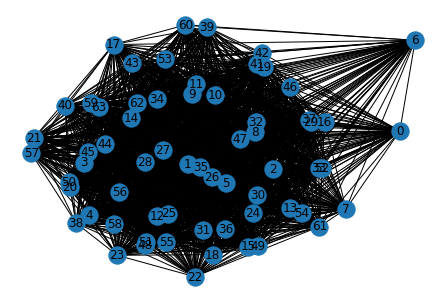

In [197]:
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}) #Getting labels is a bit annoying

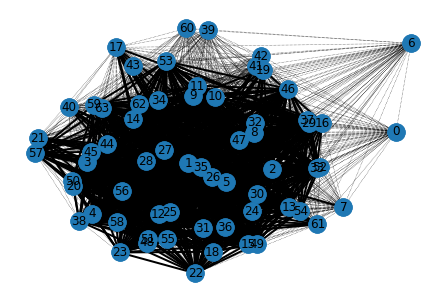

In [198]:
wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=2)

In [127]:
gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))

Name: 
Type: Graph
Number of nodes: 12829
Number of edges: 27161101
Average degree: 4234.3286


In [201]:
print(1956+42)
print(1956+34)
print(1956+40)
print(1956+61)
print(1956+43)
print(1956+39)
print(1956+60)

1998
1990
1996
2017
1999
1995
2016
